# **Average Time Spent By A User**

## **Importing Libraries**

In [125]:
import pandas as pd
import numpy as np
import seaborn as sns
import time
import matplotlib.pyplot as plt
import warnings
import plotly_express as px
# Ignorar advertencias
import plotly.offline as pyo
warnings.filterwarnings('ignore')


In [74]:
url='dummy_data.csv'
train=pd.read_csv(url,sep=',')
train.head()

,age,gender,time_spent,platform,interests,location,demographics,profession,income,indebt,isHomeOwner,Owns_Car
0,56,male,3,Instagram,Sports,United Kingdom,Urban,Software Engineer,19774,True,False,False
1,46,female,2,Facebook,Travel,United Kingdom,Urban,Student,10564,True,True,True
2,32,male,8,Instagram,Sports,Australia,Sub_Urban,Marketer Manager,13258,False,False,False
3,60,non-binary,5,Instagram,Travel,United Kingdom,Urban,Student,12500,False,True,False
4,25,male,1,Instagram,Lifestlye,Australia,Urban,Software Engineer,14566,False,True,True


In [75]:
train.shape

(1000, 12)

In [76]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   age           1000 non-null   int64 
 1   gender        1000 non-null   object
 2   time_spent    1000 non-null   int64 
 3   platform      1000 non-null   object
 4   interests     1000 non-null   object
 5   location      1000 non-null   object
 6   demographics  1000 non-null   object
 7   profession    1000 non-null   object
 8   income        1000 non-null   int64 
 9   indebt        1000 non-null   bool  
 10  isHomeOwner   1000 non-null   bool  
 11  Owns_Car      1000 non-null   bool  
dtypes: bool(3), int64(3), object(6)
memory usage: 73.4+ KB


In [77]:
train.nunique()

age              47
gender            3
time_spent        9
platform          3
interests         3
location          3
demographics      3
profession        3
income          955
indebt            2
isHomeOwner       2
Owns_Car          2
dtype: int64

In [78]:
# Some statstical information about the data
train.describe().style.background_gradient(cmap='RdGy_r')

,age,time_spent,income
count,1000.000000,1000.000000,1000.000000
mean,40.986000,5.029000,15014.823000
std,13.497852,2.537834,2958.628221
min,18.000000,1.000000,10012.000000
25%,29.000000,3.000000,12402.250000
50%,42.000000,5.000000,14904.500000
75%,52.000000,7.000000,17674.250000
max,64.000000,9.000000,19980.000000


## **EDA**

In [79]:
def myfunc(age):
    if age<2:
        return 'baby'
    elif age>2 and age<=10:
        return 'children'
    elif age>10 and age<=16:
        return 'teenage'
    elif age>16 and age<=30:
        return 'Young Adults'
    elif age>30 and age <=50:
        return 'middel aged Adults'
    elif age>50 and age<=70:
        return 'aged'
    else:
        return 'old'
    
train['Age Category']=train['age'].apply(myfunc)
train.head()

,age,gender,time_spent,platform,interests,location,demographics,profession,income,indebt,isHomeOwner,Owns_Car,Age Category
0,56,male,3,Instagram,Sports,United Kingdom,Urban,Software Engineer,19774,True,False,False,aged
1,46,female,2,Facebook,Travel,United Kingdom,Urban,Student,10564,True,True,True,middel aged Adults
2,32,male,8,Instagram,Sports,Australia,Sub_Urban,Marketer Manager,13258,False,False,False,middel aged Adults
3,60,non-binary,5,Instagram,Travel,United Kingdom,Urban,Student,12500,False,True,False,aged
4,25,male,1,Instagram,Lifestlye,Australia,Urban,Software Engineer,14566,False,True,True,Young Adults


In [80]:
# selecionar las columnas categoricas
cat=train.select_dtypes(include='object').columns
cat

Index(['gender', 'platform', 'interests', 'location', 'demographics',
       'profession', 'Age Category'],
      dtype='object')

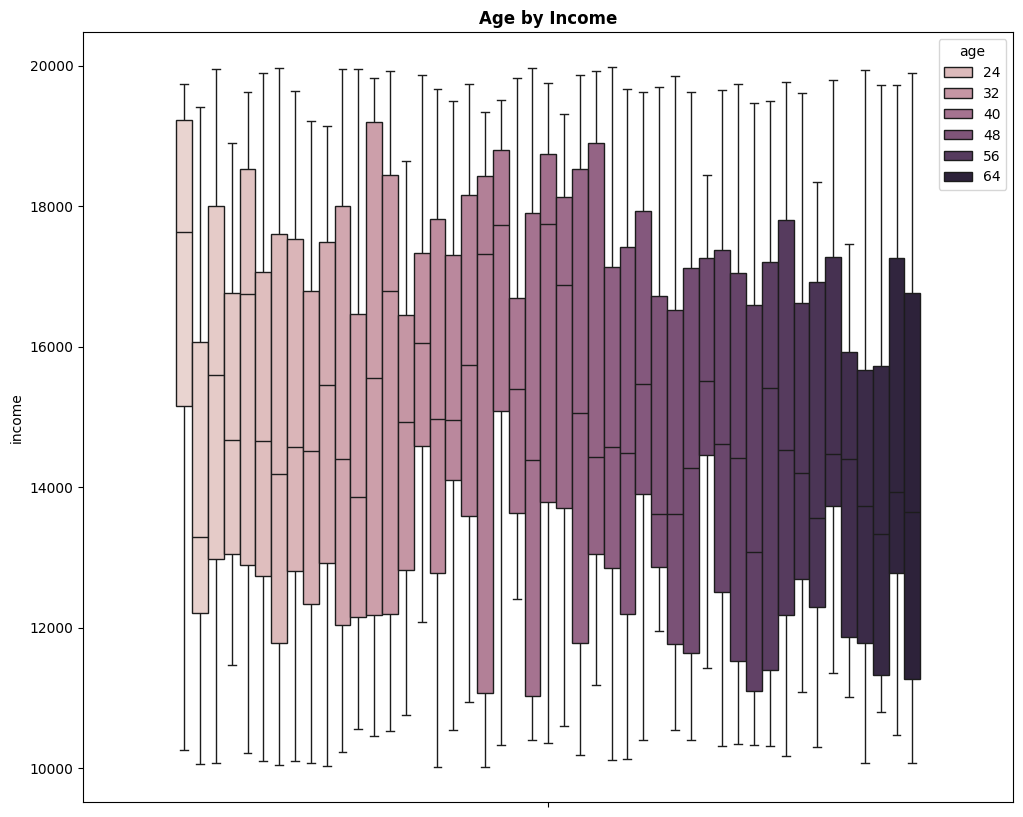

In [82]:
plt.figure(figsize=(12,10))
sns.boxplot(data=train,y='income',hue='age')
plt.title('Age by Income',fontsize=12,weight='bold')
plt.show()

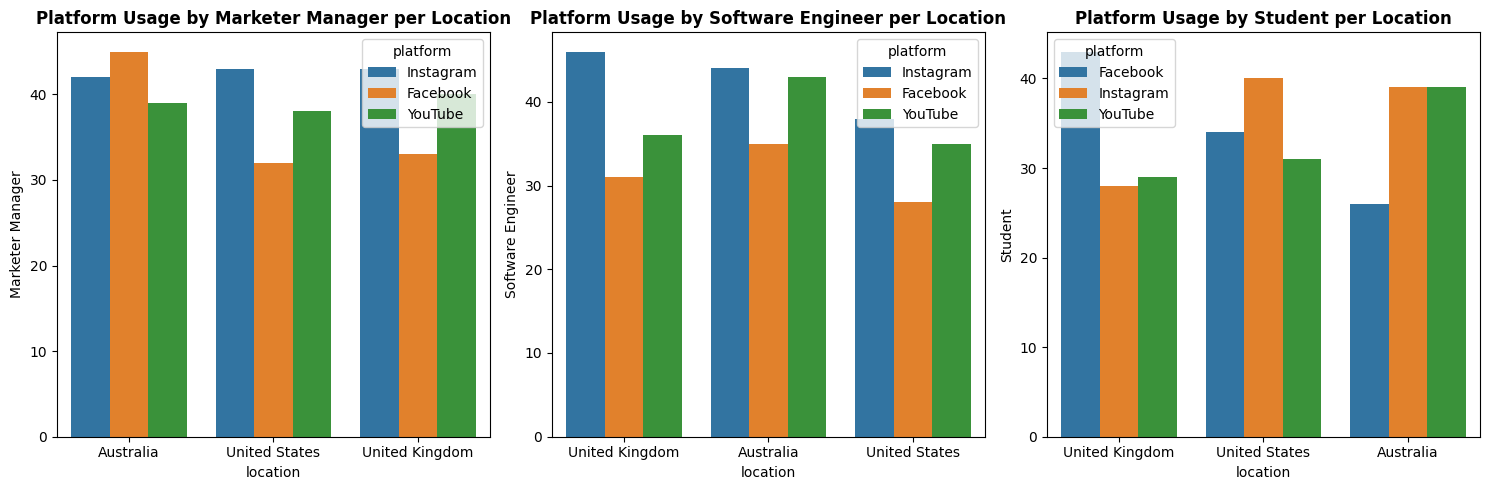

In [100]:
# Number of studing per location
col_profesion=['Marketer Manager',
'Software Engineer',
'Student']
# Crear una figura y ejes para los subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Iterar sobre cada profesión y crear el gráfico correspondiente en su ubicación en el grid
for i, profession in enumerate(col_profesion):
    # Graficar en el subplot correspondiente
    sns.countplot(data=train[train['profession'] == profession], x='location', hue='platform', ax=axes[i])
    axes[i].set_title(f'Platform Usage by {profession} per Location', fontsize=12, weight='bold')
    axes[i].set_ylabel(profession)

# Ajustar el espaciado entre los subplots
plt.tight_layout()
plt.show()
    


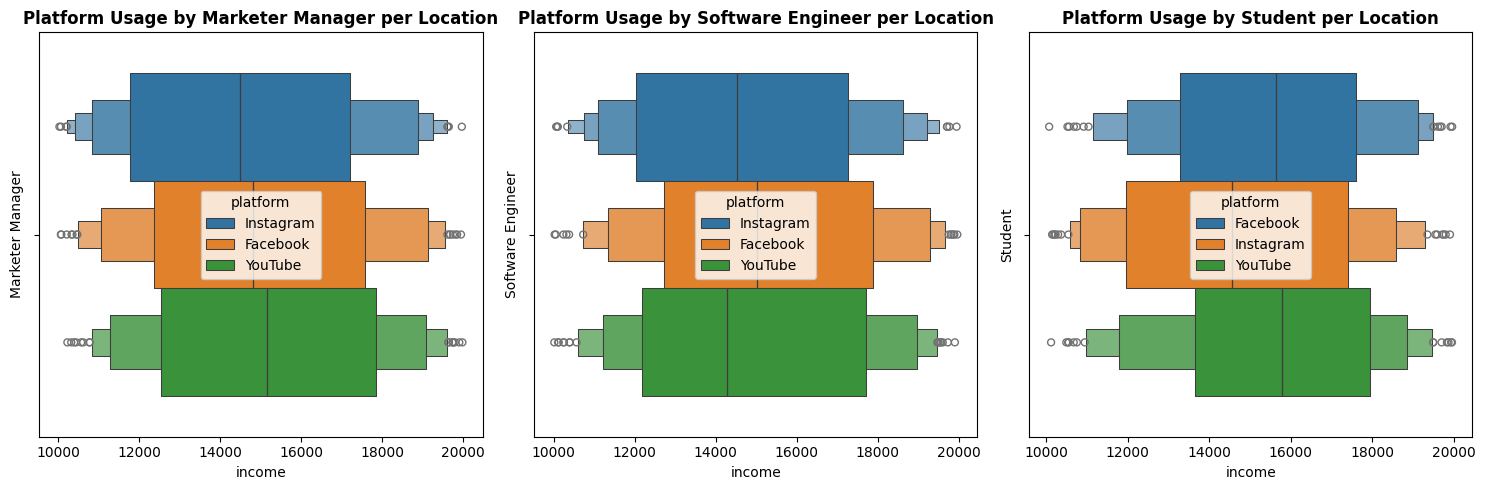

In [104]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Iterar sobre cada profesión y crear el gráfico correspondiente en su ubicación en el grid
for i, profession in enumerate(col_profesion):
    # Graficar en el subplot correspondiente
    sns.boxenplot(data=train[train['profession'] == profession], x='income', hue='platform', ax=axes[i])
    axes[i].set_title(f'Platform Usage by {profession} per Location', fontsize=12, weight='bold')
    axes[i].set_ylabel(profession)

# Ajustar el espaciado entre los subplots
plt.tight_layout()
plt.show()

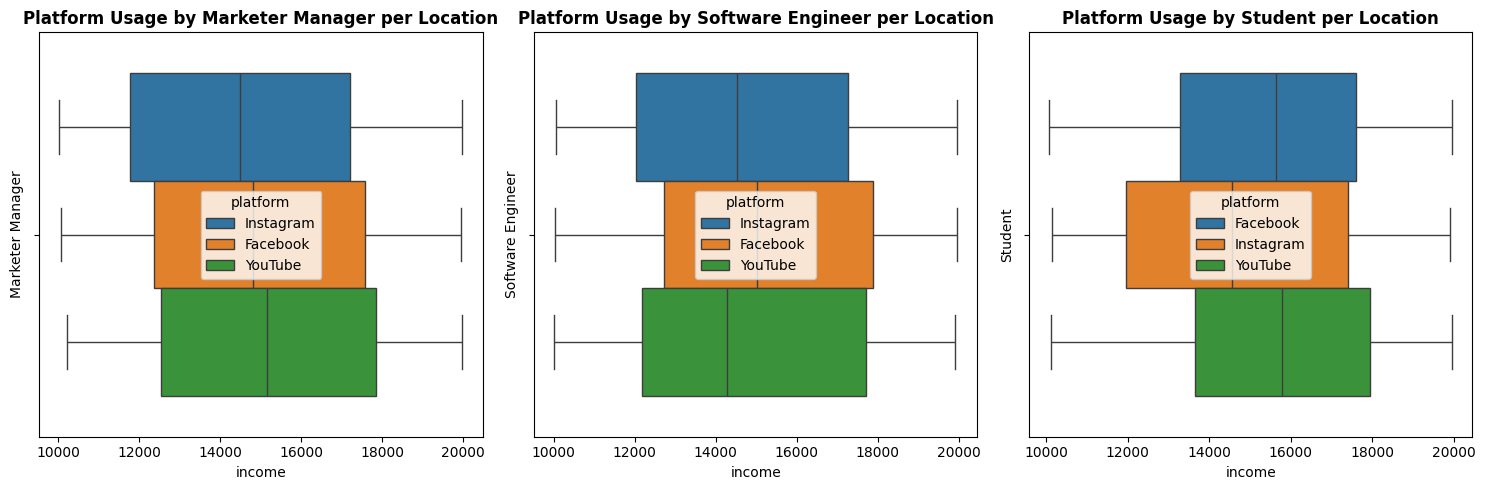

In [116]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Iterar sobre cada profesión y crear el gráfico correspondiente en su ubicación en el grid
for i, profession in enumerate(col_profesion):
    # Graficar en el subplot correspondiente
    sns.boxplot(data=train[train['profession'] == profession], x='income', hue='platform', ax=axes[i])
    axes[i].set_title(f'Platform Usage by {profession} per Location', fontsize=12, weight='bold')
    axes[i].set_ylabel(profession)

# Ajustar el espaciado entre los subplots
plt.tight_layout()
plt.show()

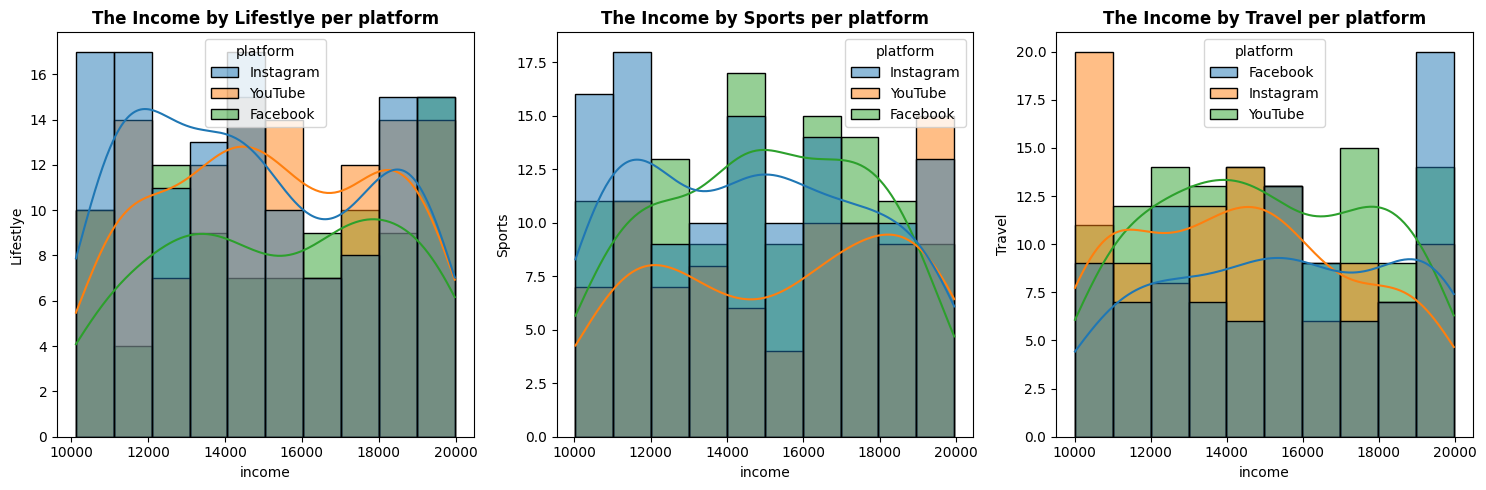

In [118]:
interests_col=['Lifestlye','Sports','Travel']
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
# Iterar sobre cada profesión y crear el gráfico correspondiente en su ubicación en el grid
for i, profession in enumerate(interests_col):
    # Graficar en el subplot correspondiente
    sns.histplot(data=train[train['interests']==profession],x='income',hue='platform',kde=True, ax=axes[i])
    axes[i].set_title(f'The Income by {profession} per platform', fontsize=12, weight='bold')
    axes[i].set_ylabel(profession)

# Ajustar el espaciado entre los subplots
plt.tight_layout()
plt.show()

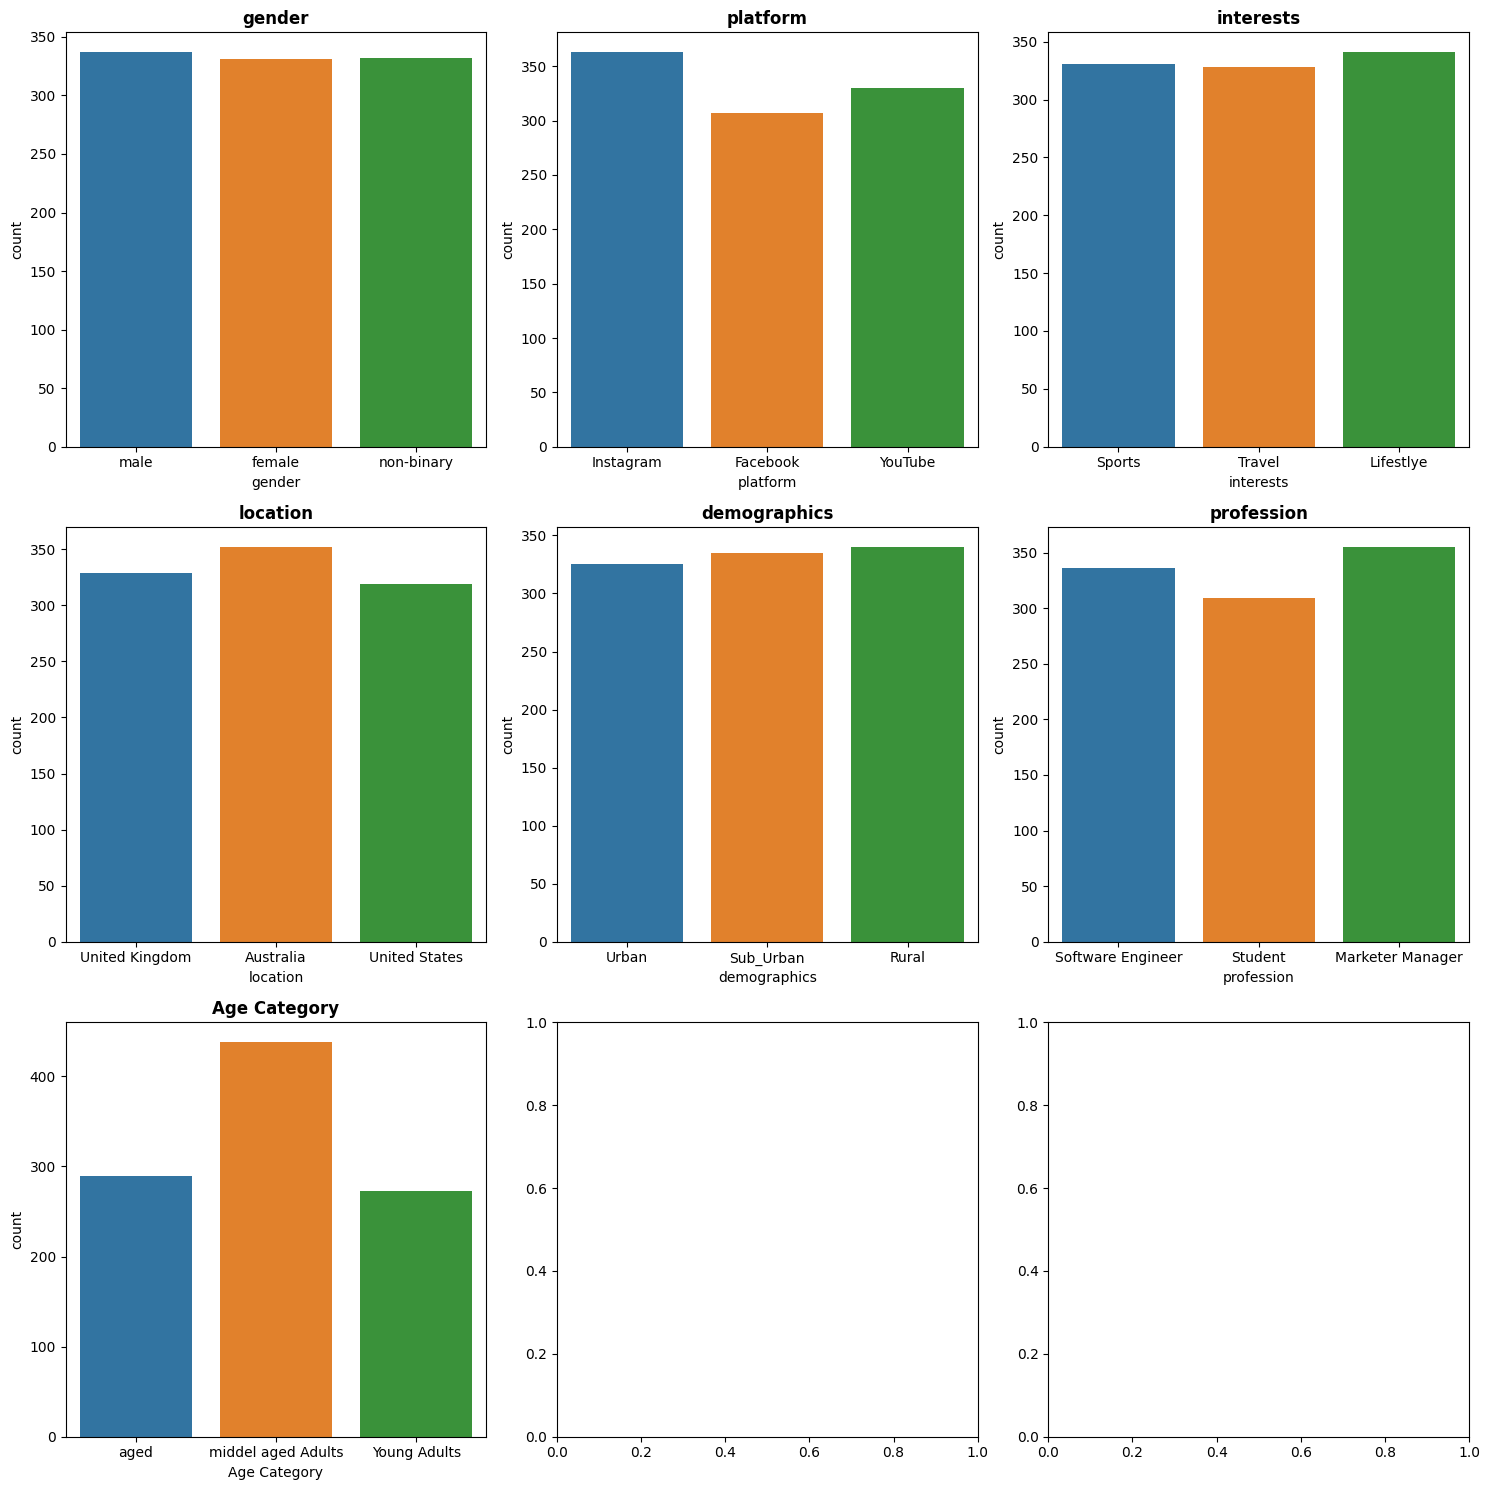

In [92]:
# Crear una figura y ejes para los subplots
fig, axes = plt.subplots(3, 3, figsize=(15, 15))

# Iterar sobre cada categoría y crear el gráfico correspondiente en su ubicación en el grid
for i, category in enumerate(cat):
    row = i // 3  # Fila actual
    col = i % 3   # Columna actual
    
    # Graficar en el subplot correspondiente
    sns.countplot(data=train, x=category, hue=category,ax=axes[row, col])
    axes[row, col].set_title(f'{category}', fontsize=12, weight='bold')

# Ajustar el espaciado entre los subplots
plt.tight_layout()
plt.show()

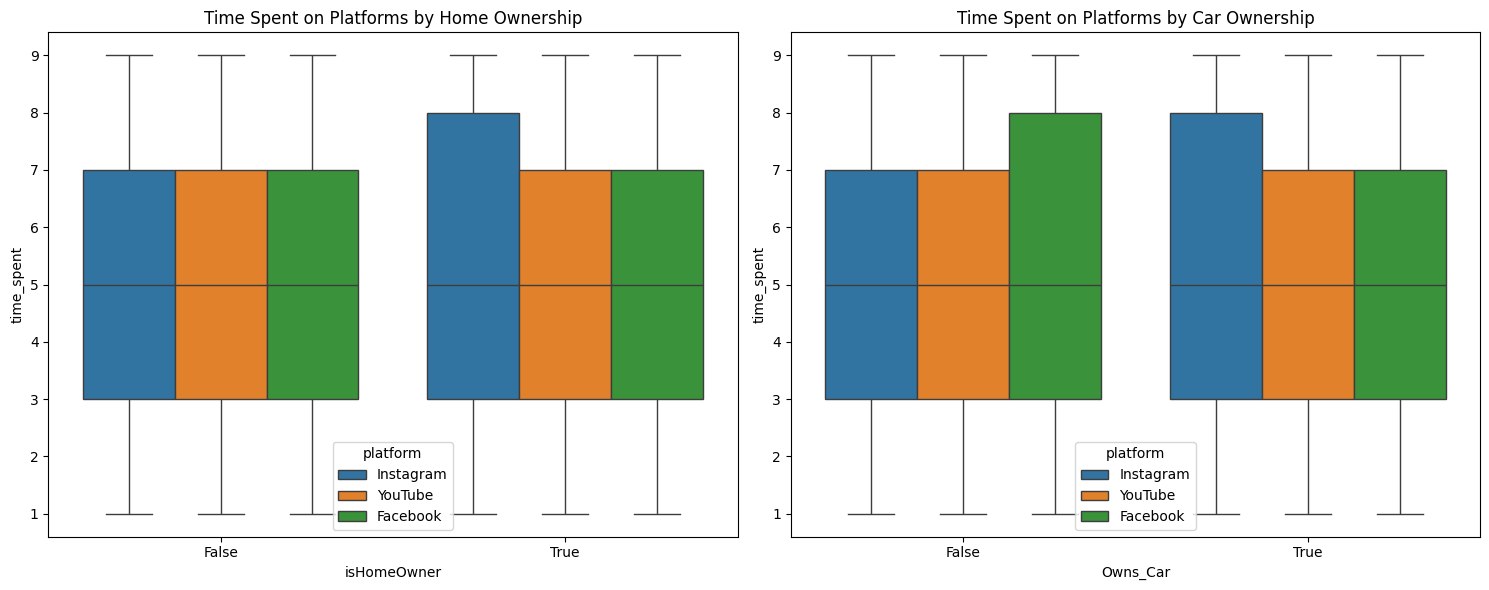

In [101]:
plt.figure(figsize=(15, 6))

# Boxplot for isHomeOwner
plt.subplot(1, 2, 1)
sns.boxplot(data=train, x='isHomeOwner', y='time_spent', hue='platform')
plt.title('Time Spent on Platforms by Home Ownership')

# Boxplot for Owns_Car
plt.subplot(1, 2, 2)
sns.boxplot(data=train, x='Owns_Car', y='time_spent', hue='platform')
plt.title('Time Spent on Platforms by Car Ownership')

plt.tight_layout()
plt.show()

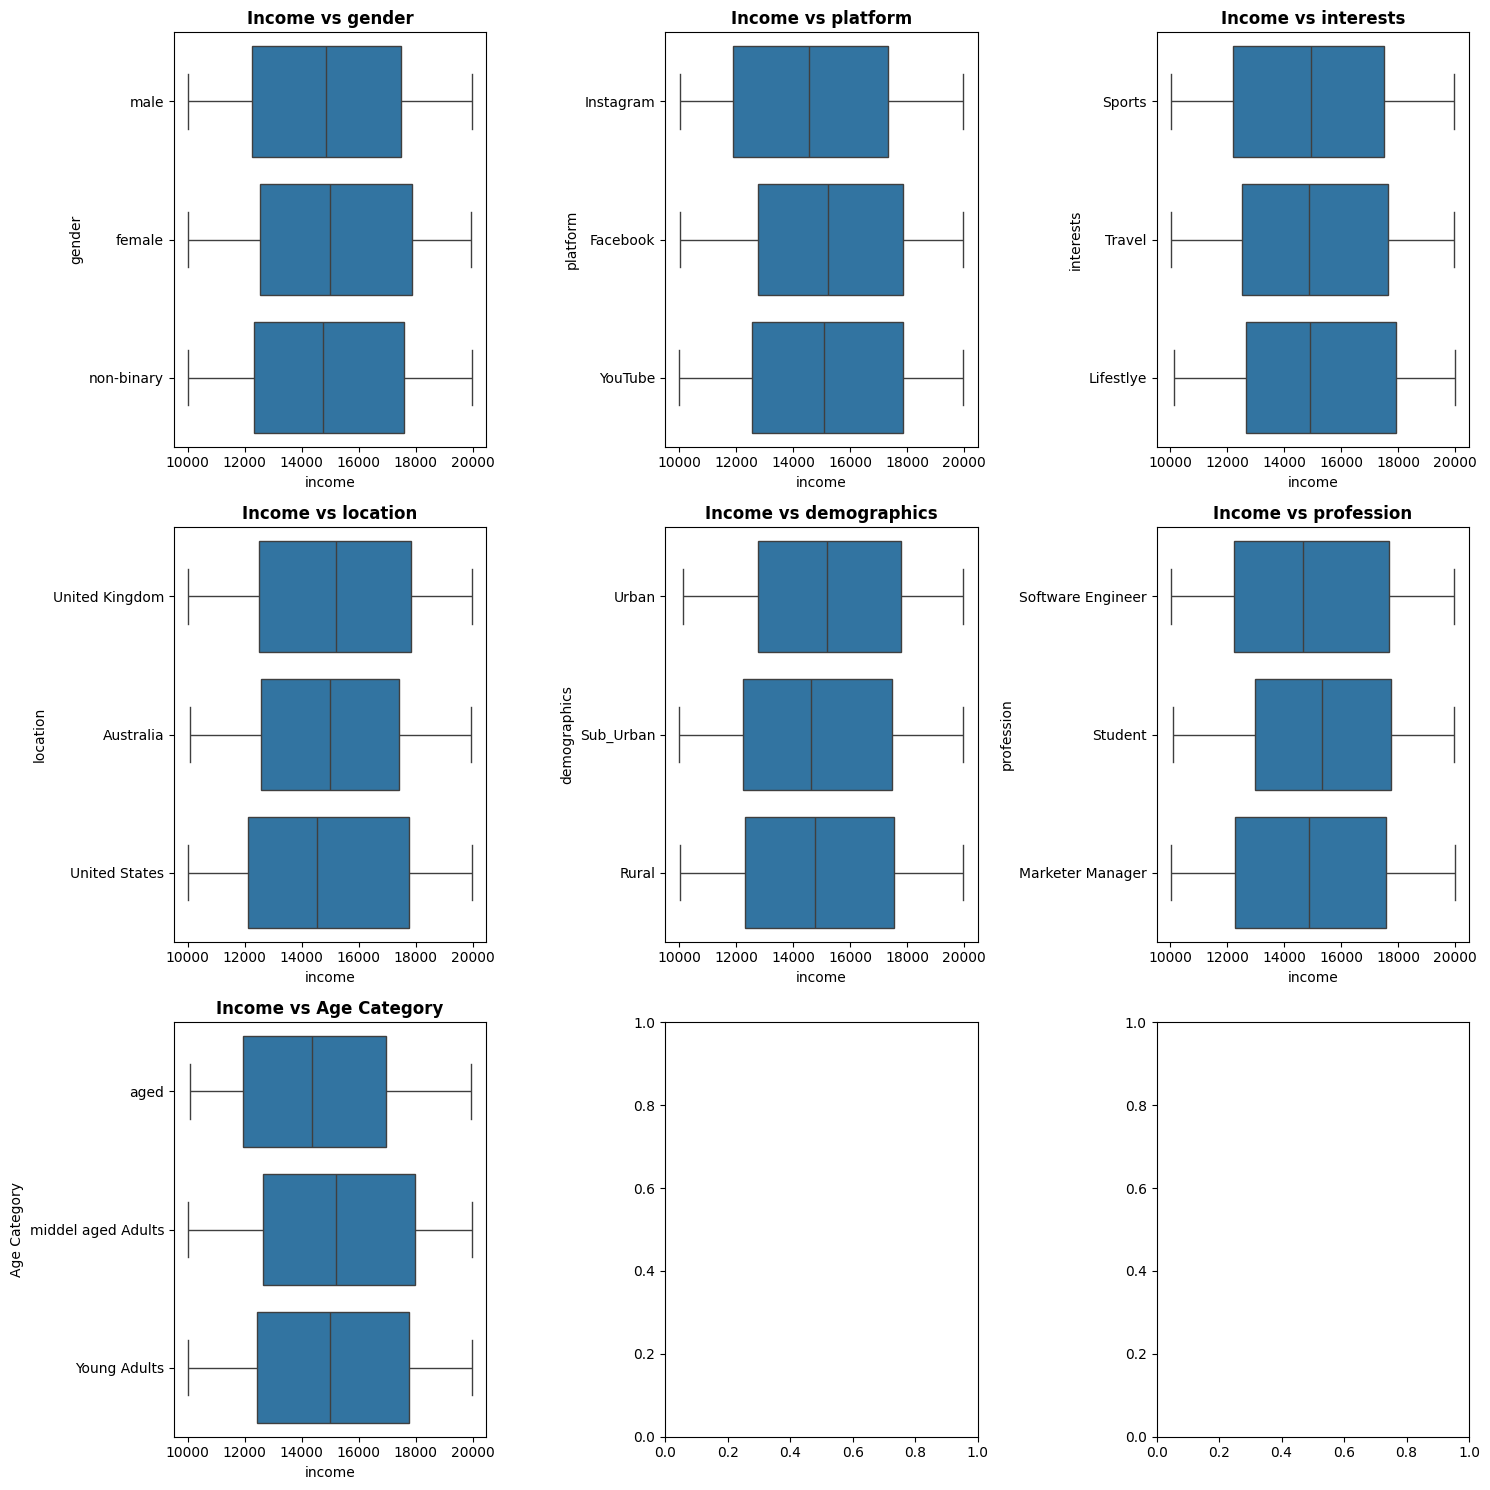

In [83]:
# Crear una figura y ejes para los subplots
fig, axes = plt.subplots(3, 3, figsize=(15, 15))

# Iterar sobre cada categoría y crear el gráfico correspondiente en su ubicación en el grid
for i, category in enumerate(cat):
    row = i // 3  # Fila actual
    col = i % 3   # Columna actual
    
    # Graficar en el subplot correspondiente
    sns.boxplot(data=train, x='income', y=category, ax=axes[row, col])
    axes[row, col].set_title(f'Income vs {category}', fontsize=12, weight='bold')

# Ajustar el espaciado entre los subplots
plt.tight_layout()
plt.show()

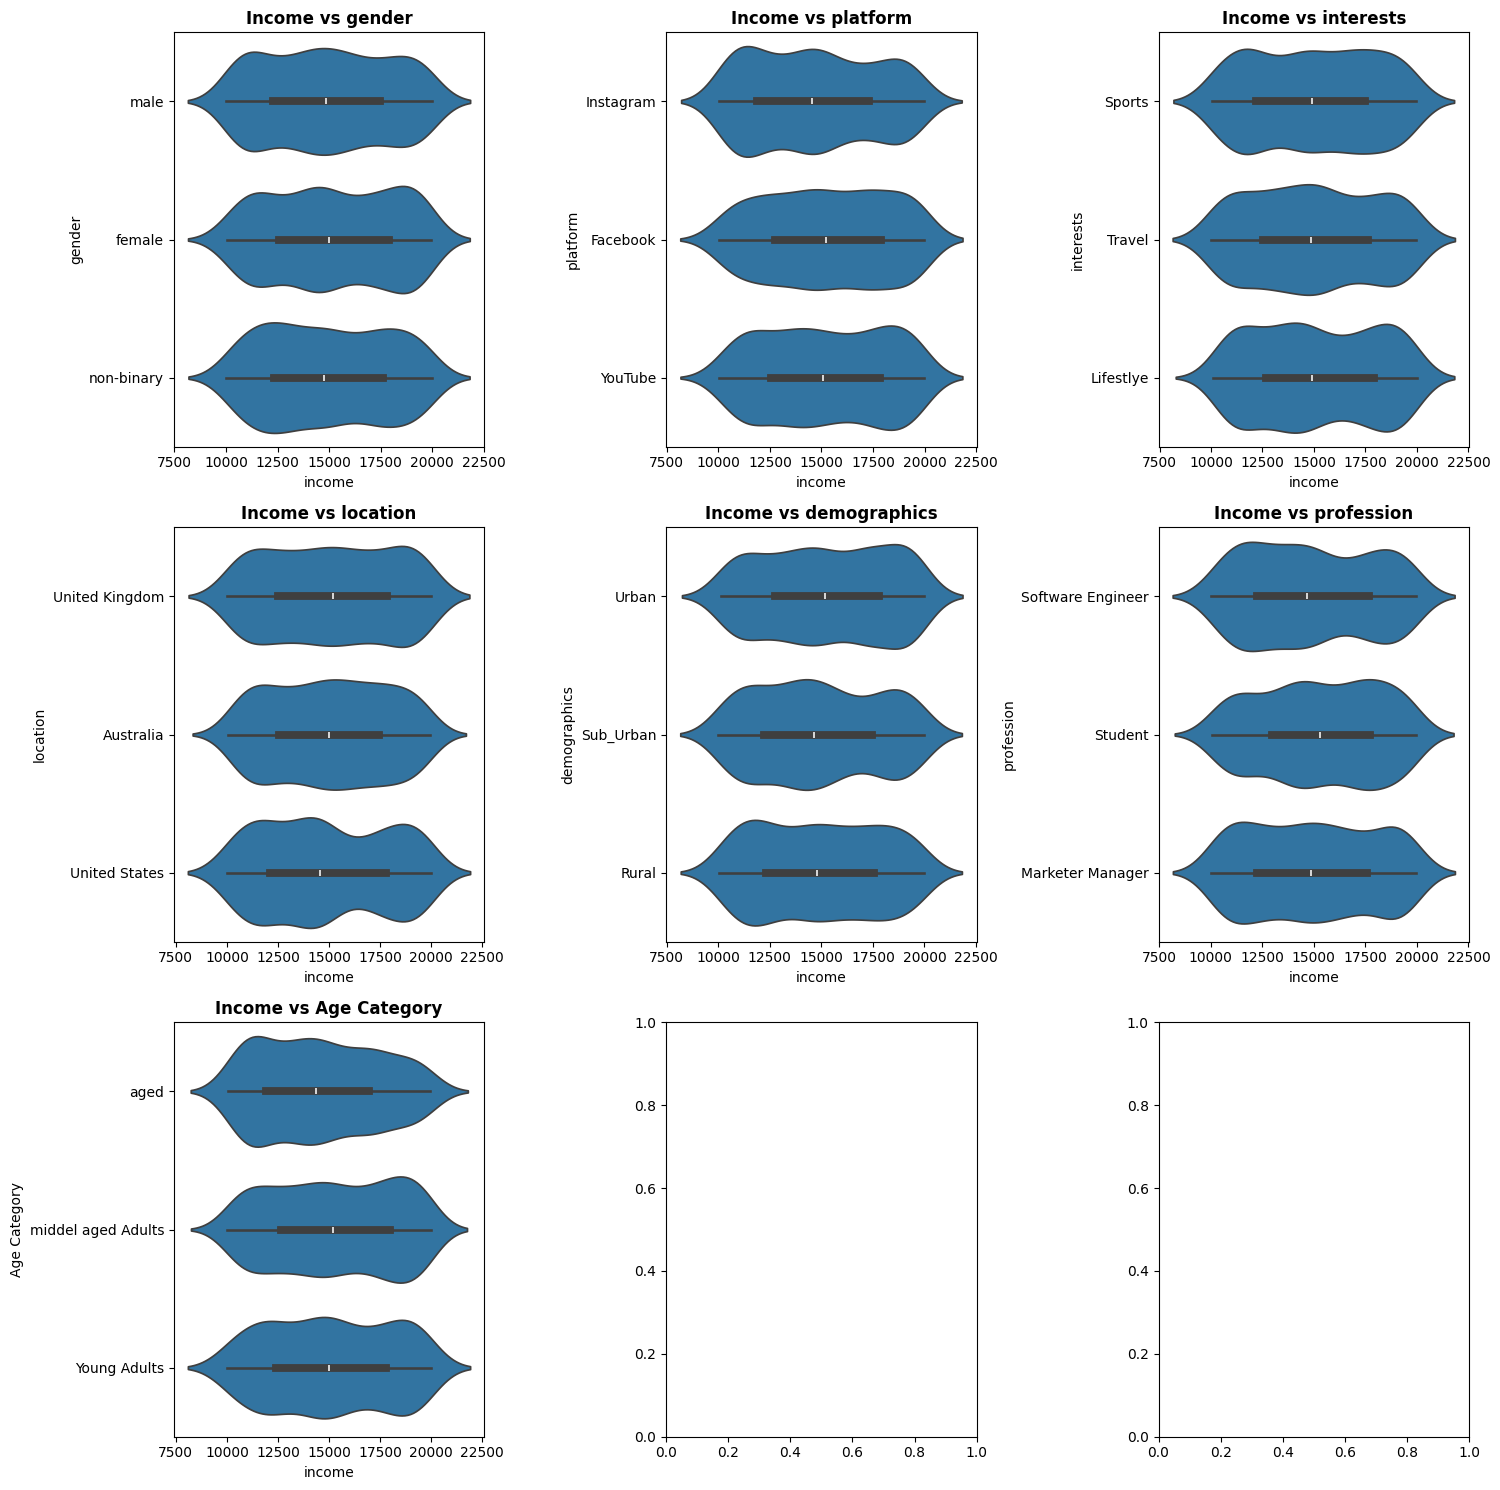

In [84]:
# Crear una figura y ejes para los subplots
fig, axes = plt.subplots(3, 3, figsize=(15, 15))

# Iterar sobre cada categoría y crear el gráfico correspondiente en su ubicación en el grid
for i, category in enumerate(cat):
    row = i // 3  # Fila actual
    col = i % 3   # Columna actual
    
    # Graficar en el subplot correspondiente
    sns.violinplot(data=train, x='income', y=category, ax=axes[row, col])
    axes[row, col].set_title(f'Income vs {category}', fontsize=12, weight='bold')

# Ajustar el espaciado entre los subplots
plt.tight_layout()
plt.show()

**Time Spent**

In [133]:
avg_time_spent=train.groupby(by=['platform']).agg({'time_spent':'mean'}).reset_index()
avg_time_spent.head()
fig=px.bar(avg_time_spent,x='platform',y='time_spent',color='time_spent',title='Avg. Time spent on Social media platforms')
fig.show(render='iframe')

In [137]:
avg_time_genderwise=train.groupby(by=['gender']).agg({'time_spent':'mean'}).reset_index()
avg_time_genderwise
fig=px.bar(avg_time_genderwise,x='gender',y='time_spent',color='time_spent',title='Time Spent on Social Media by Gender')
fig.show(render='iframe')

In [136]:
avg_time_professionwise=train.groupby(by=['profession']).agg({'time_spent':'mean'}).reset_index()
avg_time_professionwise
fig=px.bar(avg_time_professionwise,x='profession',y='time_spent',color='time_spent',title='Time Spent on Social Media by Profession')
fig.show(render='iframe')

In [139]:
profession_SocialMedia_avgTime=train.groupby(by=['profession','platform']).agg({'time_spent':'mean'}).reset_index()
profession_SocialMedia_avgTime
fig=px.bar(profession_SocialMedia_avgTime,x='profession',y='time_spent',color='platform',barmode='group',title='Average Time Spent on Social Media Platforms by Profession')
fig.show(render='iframe')

In [140]:
profession_location_avgtime=train.groupby(by=['location','platform']).agg({'time_spent':'mean'}).reset_index()
profession_location_avgtime
fig=px.bar(profession_location_avgtime,
           x='location',y='time_spent',color='platform',barmode='group',
           title="Average Time Spent on Social Media Platforms by Location")
fig.show(render='iframe')


In [142]:
agecategory_timemean=train.groupby(by=['Age Category']).agg({'time_spent':'mean'}).reset_index()
fig=px.bar(agecategory_timemean,
           x='Age Category',y='time_spent',barmode='group',
          title="Average Time Spent on Social Media by Age Category")
fig.show(render='iframe')